# GTZAN Dataset - Notebook for Initial Tests

## Import Required Libraries

In [1]:
# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import tensorflow_datasets as tfds

# Librosa
import librosa
import librosa.display
import IPython.display as ipd
import warnings
import os

# Load one song of the GTZAN Dataset

In [2]:
general_path = '../Data'
print(list(os.listdir(f'{general_path}/genres_original/')))

# Importing 1 file
y, sr = librosa.load(f'{general_path}/genres_original/reggae/reggae.00036.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', 661794/22050)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
y: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


# Trimming silence before and after

In [3]:
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

Audio File shape: (661794,)


# 2D Representation: Sound Waves

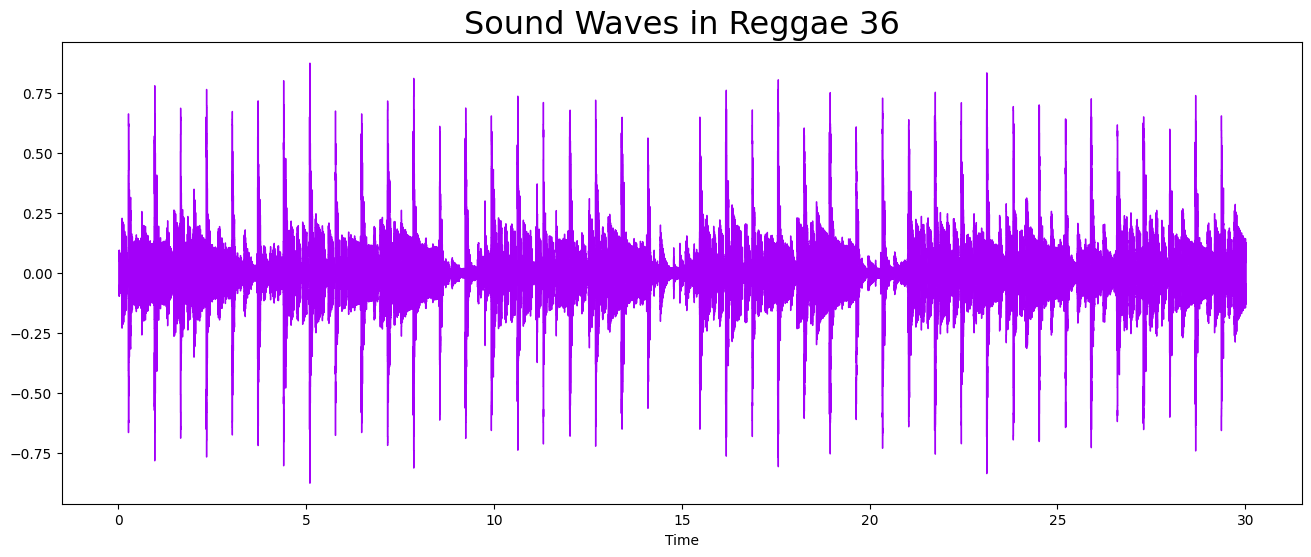

In [4]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F9");
plt.title("Sound Waves in Reggae 36", fontsize = 23);

# Fourier Transform
 * Function that gets a signal in the time domain as input, and outputs its decomposition into frequencies
 * Transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is approx. the log scale of amplitudes.

In [5]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 1293)


 ...]

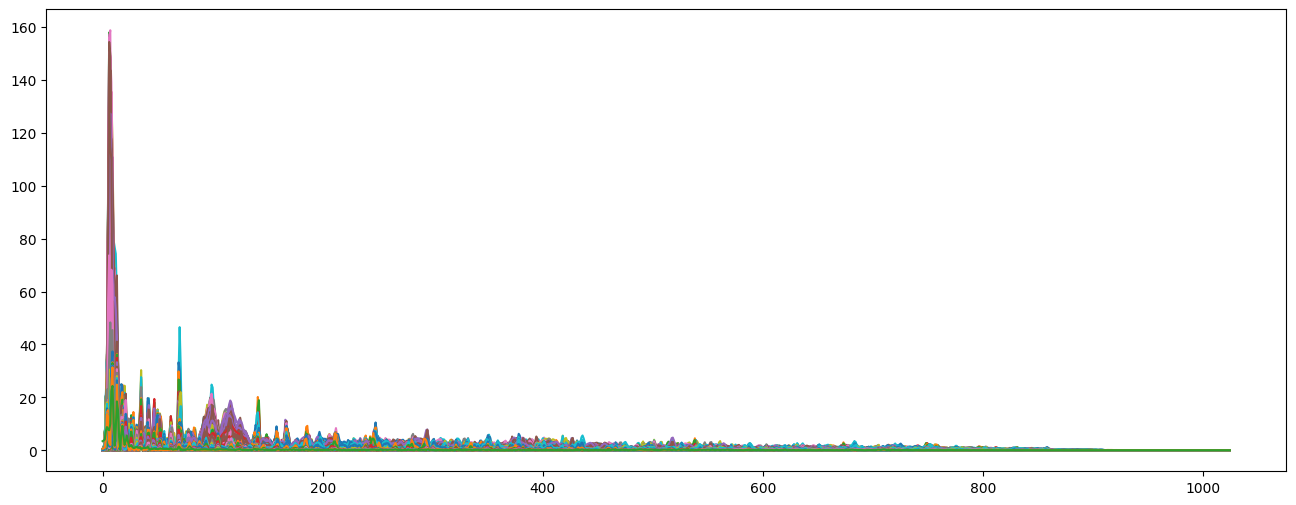

In [6]:
plt.figure(figsize = (16, 6))
plt.plot(D)

# The Spectrogram
* What is a spectrogram? A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. When applied to an audio signal, spectrograms are sometimes called sonographs, voiceprints, or voicegrams (wiki).
* Here we convert the frequency axis to a logarithmic one.

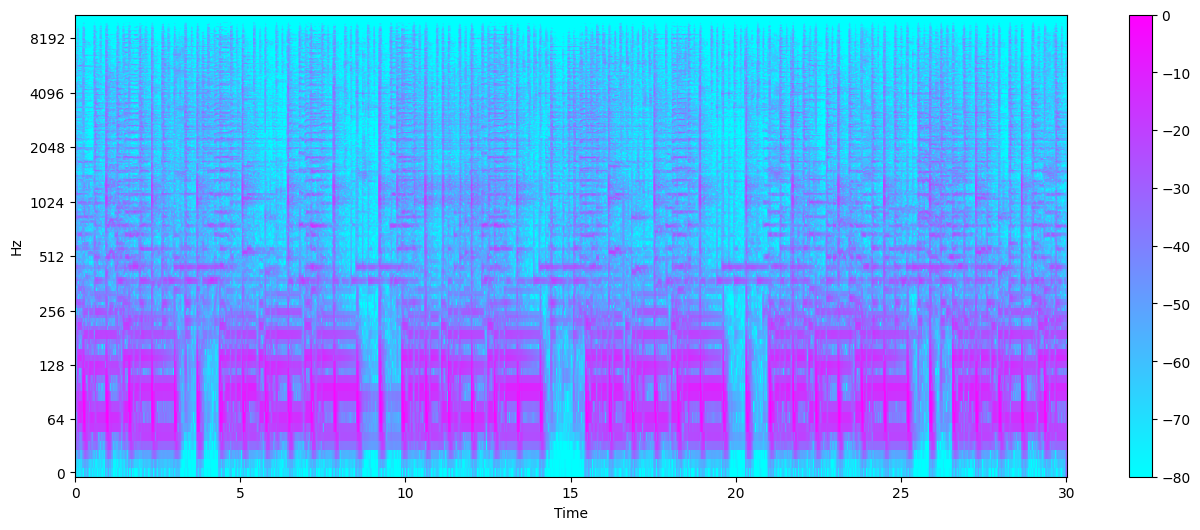

In [7]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar()

# EDA

EDA is going to be performed on the features_30_sec.csv. This file contains the mean and variance for each audio file fo the features analysed above.

So, the table has a final of 1000 rows (10 genrex x 100 audio files) and 60 features (dimensionalities).

In [8]:
data = pd.read_csv(f'{general_path}/features_30_sec.csv')
data.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516           213843.755497  ...   55.356403   
2              1747.702312            76254.192257  ...   40.598766   
3              1596.412872           166441.494769  ...   44.427753   
4              1748.172116            88445.209036  ...   86.099236   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -1.690215   36.524071    -0.408979   41.597103    -2.303523   55.062923   
1    -0.731125   60.314529     0.295073   48.120598    -0.283518   51.106190   
2    -7.729093   47.639427    -1.816407   52.382141    -3.439720   46.639660   
3    -3.319597   50.206673     0.636965   37.319130    -0.619121   37.259739   
4    -5.454034   75.269707    -0.916874   53.613918    -4.404827   62.910812   

   mfcc20_mean  mfcc20_var  label  
0     1.221291   46.936035  blues  
1     0.531217   45.786282  blues  
2    -2.231258   30.573025  blues  
3    -3.407448   31.949339  blues  
4   -11.703234   55.195160  blues  

[5 rows x 60 columns]

Correlation Heatmap for feature means

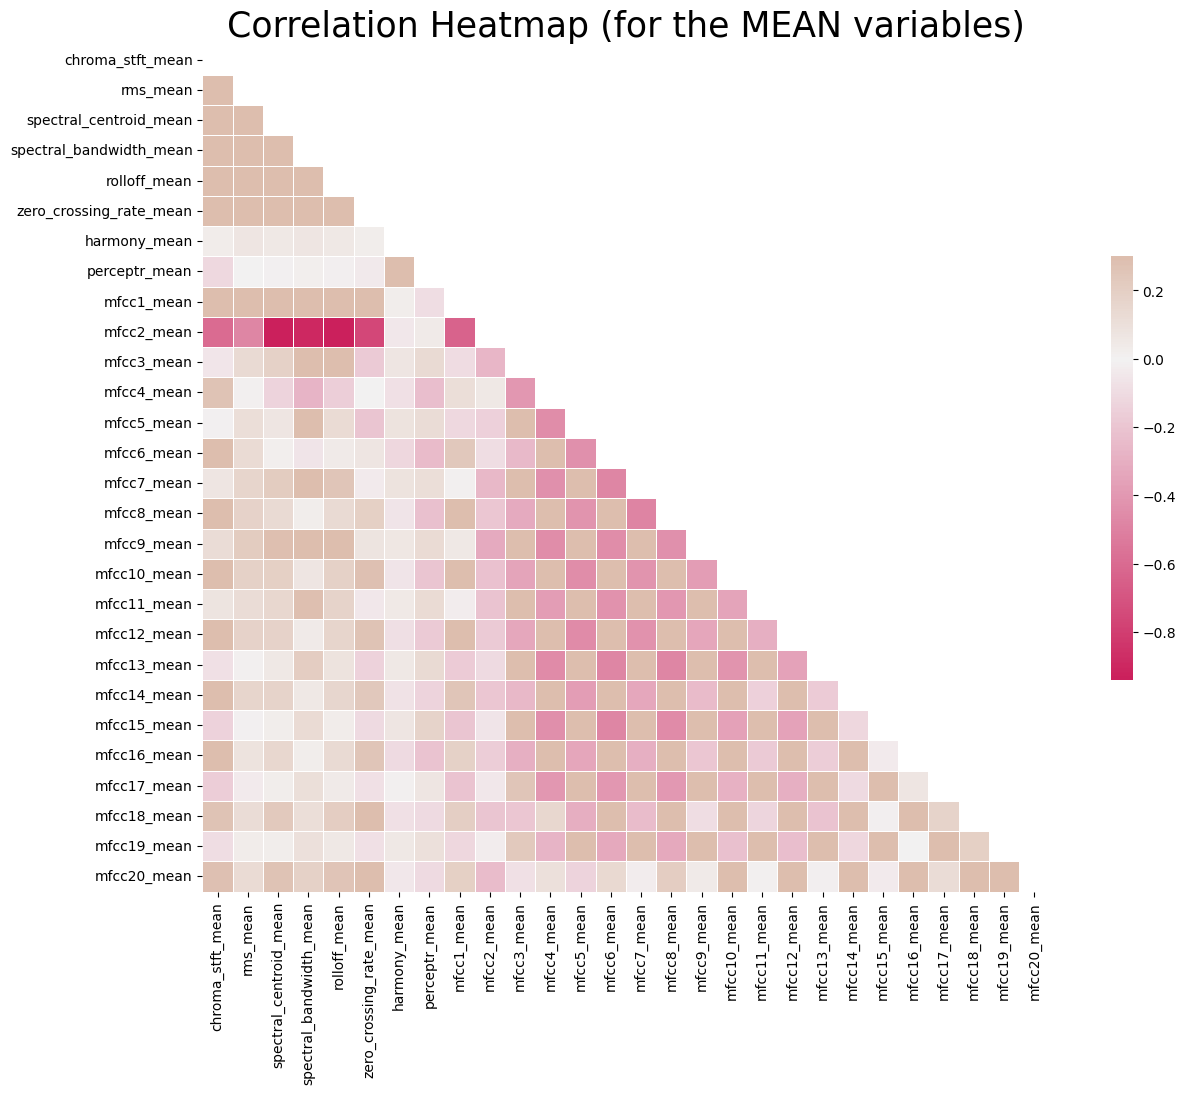

In [9]:
# Computing the Correlation Matrix
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.savefig("Corr Heatmap.jpg")

Box Plot for Genres Distributions

C:\Users\pierr\AppData\Local\Temp\ipykernel_26644\2089301459.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');


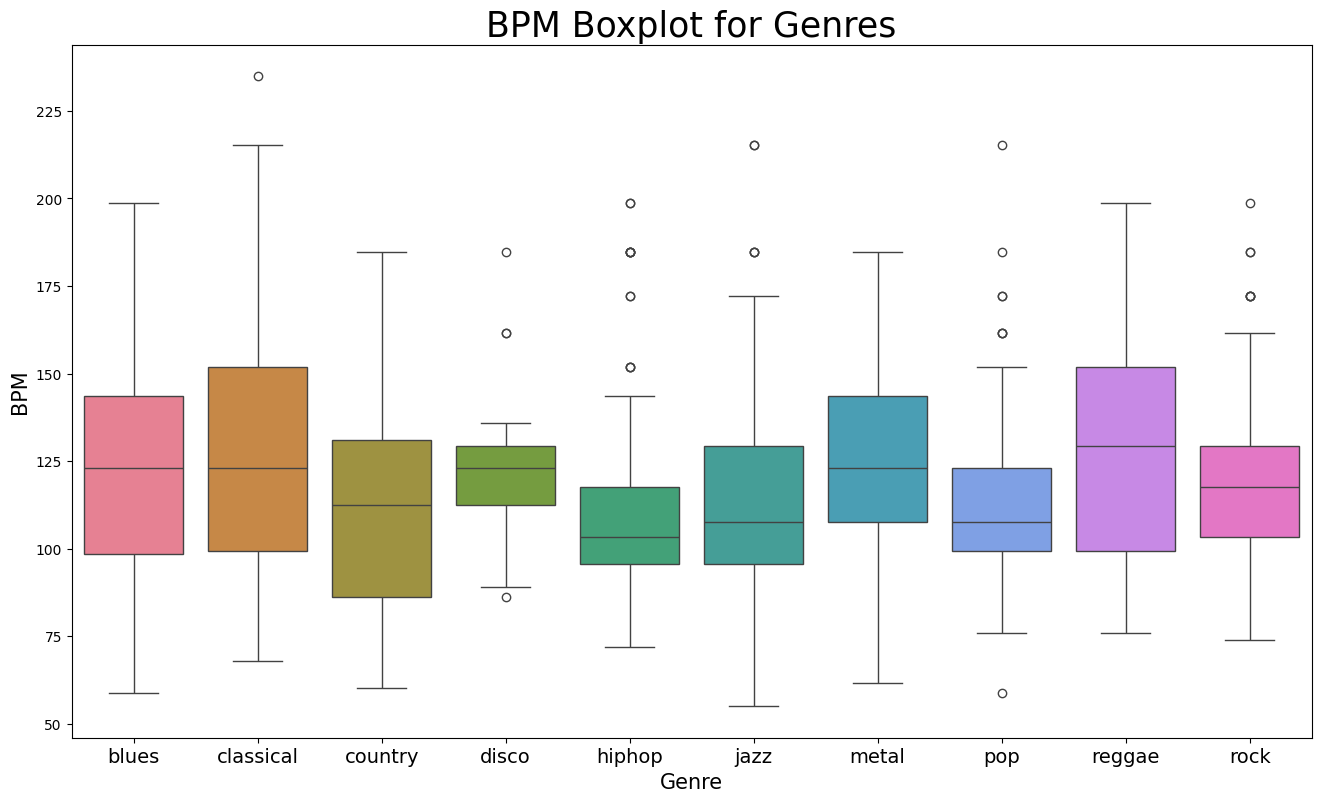

In [10]:
x = data[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM Boxplot.jpg")

# Principal Component Analysis - to visualize possible groups of genres¶
* Normalization
* PCA
* The Scatter Plot

In [11]:
from sklearn import preprocessing

data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

# 44.93 variance explained

array([0.2439355 , 0.21781804])

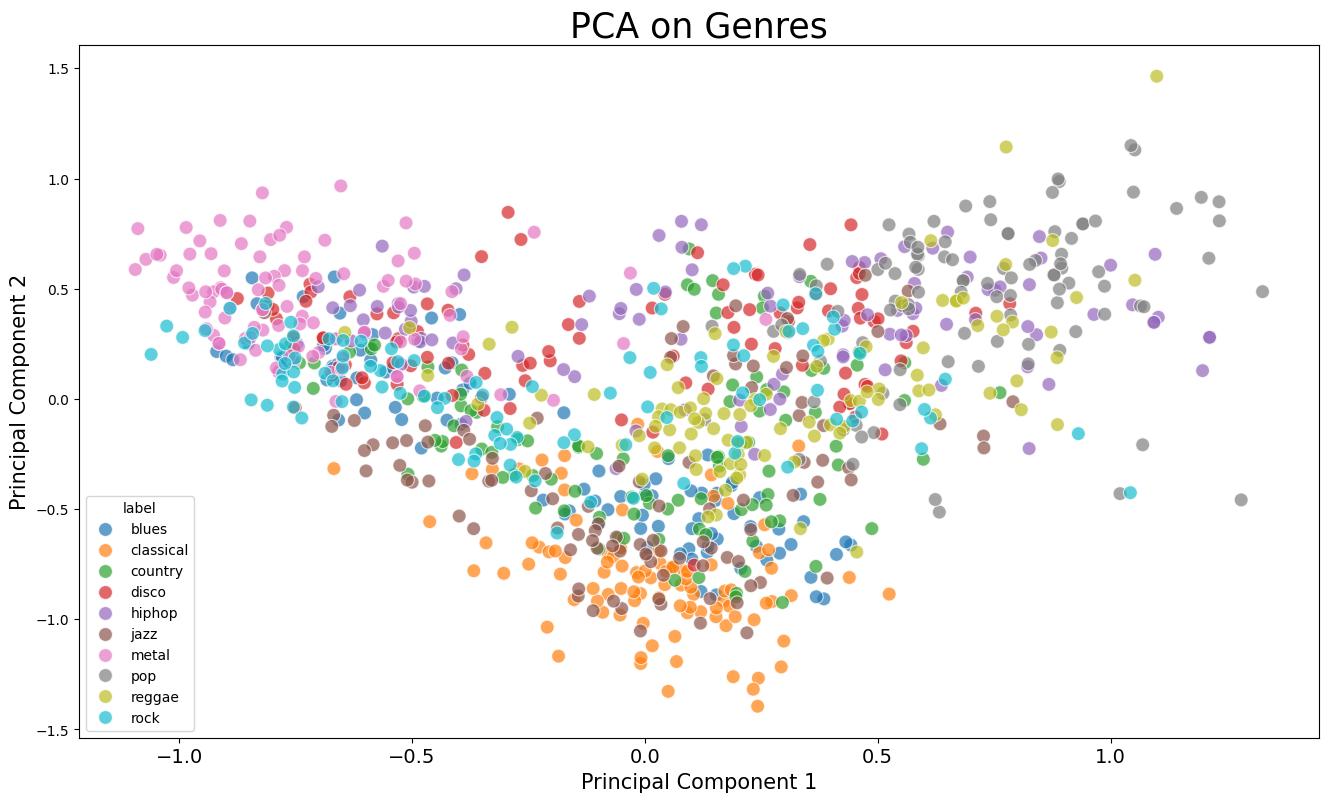

In [12]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

# Machine Learning Classification¶
Using the features_3_sec.csv file, we can try to build a classifier that accurately predicts for any new audio file input it's genre.

Libraries

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

Reading in the Data
Now let's try to predict the Genre of the audio using Machine Learning techniques.

In [14]:
data = pd.read_csv(f'{general_path}/features_3_sec.csv')
data = data.iloc[0:, 1:] 
data.head()


length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0   66149          0.335406         0.091048  0.130405  0.003521   
1   66149          0.343065         0.086147  0.112699  0.001450   
2   66149          0.346815         0.092243  0.132003  0.004620   
3   66149          0.363639         0.086856  0.132565  0.002448   
4   66149          0.335579         0.088129  0.143289  0.001701   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.065032          167541.630869              1972.744388   
1             1816.693777           90525.690866              2010.051501   
2             1788.539719          111407.437613              2084.565132   
3             1655.289045          111952.284517              1960.039988   
4             1630.656199           79667.267654              1948.503884   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc16_var  mfcc17_mean  \
0           117335.771563   3714.560359  ...   39.687145    -3.241280   
1            65671.875673   3869.682242  ...   64.748276    -6.055294   
2            75124.921716   3997.639160  ...   67.336563    -1.768610   
3            82913.639269   3568.300218  ...   47.739452    -3.841155   
4            60204.020268   3469.992864  ...   30.336359     0.664582   

   mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  \
0   36.488243     0.722209   38.099152    -5.050335   33.618073    -0.243027   
1   40.677654     0.159015   51.264091    -2.837699   97.030830     5.784063   
2   28.348579     2.378768   45.717648    -1.938424   53.050835     2.517375   
3   28.337118     1.218588   34.770935    -3.580352   50.836224     3.630866   
4   45.880913     1.689446   51.363583    -3.392489   26.738789     0.536961   

   mfcc20_var  label  
0   43.771767  blues  
1   59.943081  blues  
2   33.105122  blues  
3   32.023678  blues  
4   29.146694  blues  

[5 rows x 59 columns]

# Features and Target variable
* creates the target and feature variables
* normalizes the data

In [15]:
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels

#### NORMALIZE X ####

# Normalize so everything is on the same scale. 

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

Splitting the data into training and testing
70% - 30% split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a Predefined function to assess the accuracy of a model
* input is the model
* fits the model on the training dataset
* predicts on the testing features
* compares the predictions with the actuals

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Créer un encodeur pour transformer les labels en entiers
label_encoder = LabelEncoder()

# Encoder les labels dans y_train et y_test
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
print('y_train encoded: ', y_train_encoded)
print('size of ', len(y_train_encoded))

# Maintenant, vous pouvez passer les labels encodés au modèle
def model_assess(model, title="Default"):
    model.fit(X_train, y_train_encoded)  # Utilisez les labels encodés
    preds = model.predict(X_test)  # Prédictions sur le jeu de test

    # Afficher les résultats
    print(f"Résultats pour {title}:")
    print("Précision:", accuracy_score(y_test_encoded, preds))  # Comparer avec les labels encodés


y_train encoded:  [5 3 9 ... 5 0 7]
size of  6993


Trying 10 different models to assess their performance
We tried 10 classification models, the best performing model was XGBooster.

In [18]:


# # Ensuite, vous pouvez tester vos modèles comme prévu :
# # Naive Bayes
# nb = GaussianNB()
# model_assess(nb, "Naive Bayes")

# # Stochastic Gradient Descent
# sgd = SGDClassifier(max_iter=5000, random_state=0)
# model_assess(sgd, "Stochastic Gradient Descent")

# # KNN
# knn = KNeighborsClassifier(n_neighbors=19)
# model_assess(knn, "KNN")

# # Decision trees
# tree = DecisionTreeClassifier()
# model_assess(tree, "Decision Trees")

# # Random Forest
# rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
# model_assess(rforest, "Random Forest")

# # Support Vector Machine
# svm = SVC(decision_function_shape="ovo")
# model_assess(svm, "Support Vector Machine")

# # Logistic Regression
# lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
# model_assess(lg, "Logistic Regression")

# # Neural Nets
# nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
# model_assess(nn, "Neural Nets")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective='multi:softmax')
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")


Résultats pour Cross Gradient Booster:
Précision: 0.9012345679012346
Résultats pour Cross Gradient Booster (Random Forest):
Précision: 0.7474140807474141


# XGBoost is the winner - 90% accuracy
* create the final model
* compute confusion matrix
* Compute Feature Importance

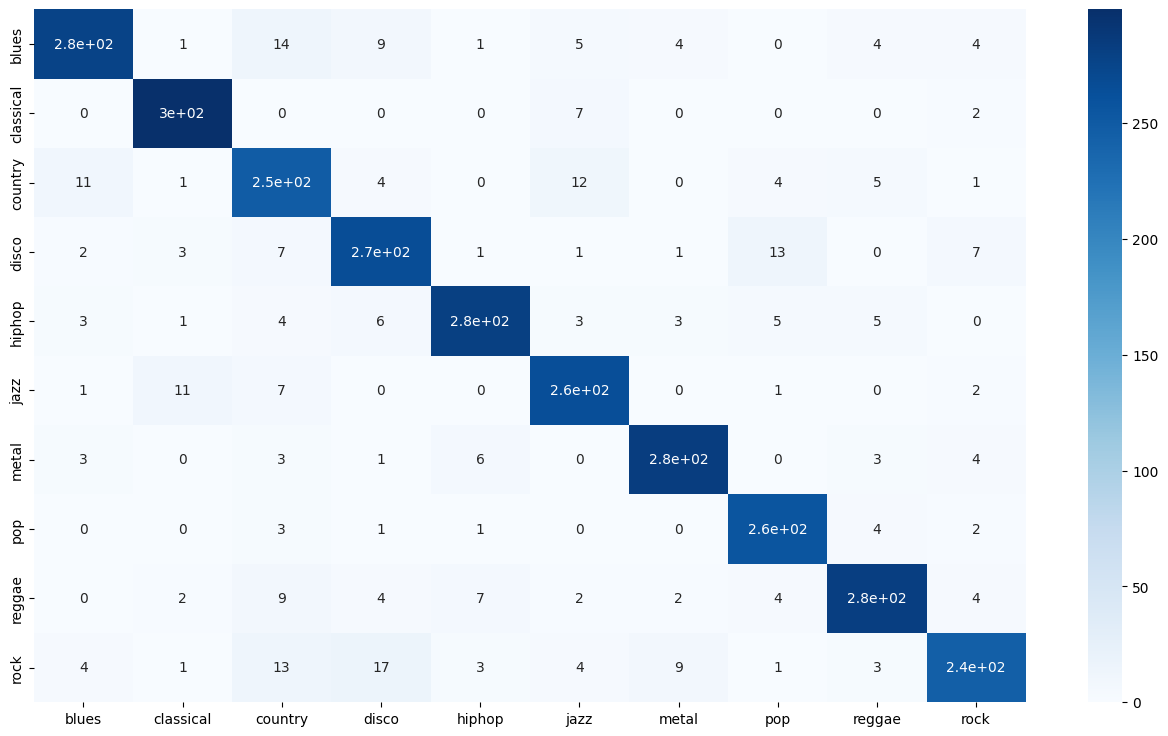

In [32]:

# Entraînement du modèle (par exemple XGB)
xgb_model = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb_model.fit(X_train, y_train_encoded)


# Confusion Matrix
preds = xgb.predict(X_test)
confusion_matr = confusion_matrix(y_test_encoded, preds) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.savefig("conf matrix")


In [ ]:
ipd.Audio(f'../audio_coupe_30sec.wav')

In [ ]:
import librosa
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier

def predict_genre(audio_path, model, scaler, feature_columns):
    """
    Prédit le genre musical d'un fichier audio de 30 secondes.
    
    Arguments :
        audio_path (str) : chemin du fichier audio (wav, mp3, etc.).
        model (XGBClassifier) : modèle entraîné pour la classification.
        scaler (MinMaxScaler) : scaler utilisé pour normaliser les données.
        feature_columns (list) : noms des colonnes utilisées comme caractéristiques.
    
    Retour :
        str : genre prédit.
    """
    try:
        # Charger l'audio et extraire les caractéristiques
        y, sr = librosa.load(audio_path, duration=30)  # 30 secs
        harmonic, _ = librosa.effects.hpss(y)
        tempo, _ = librosa.beat.beat_track(y=y, sr=sr)


        features = {
            "lenght": len(y) /sr,
            "harmony_mean": np.mean(harmonic),
            "harmony_var": np.var(harmonic),
            "tempo": tempo,
            "chroma_stft_mean": np.mean(librosa.feature.chroma_stft(y=y, sr=sr)),
            "chroma_stft_var": np.var(librosa.feature.chroma_stft(y=y, sr=sr)),
            "rms_mean": np.mean(librosa.feature.rms(y=y)),
            "rms_var": np.var(librosa.feature.rms(y=y)),
            "spectral_centroid_mean": np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
            "spectral_centroid_var": np.var(librosa.feature.spectral_centroid(y=y, sr=sr)),
            "spectral_bandwidth_mean": np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
            "spectral_bandwidth_var": np.var(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
            "rolloff_mean": np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)),
            "rolloff_var": np.var(librosa.feature.spectral_rolloff(y=y, sr=sr)),
            "zero_crossing_rate_mean": np.mean(librosa.feature.zero_crossing_rate(y)),
            "zero_crossing_rate_var": np.var(librosa.feature.zero_crossing_rate(y)),
            **{
                f"mfcc{i}_mean": np.mean(mfcc)
                for i, mfcc in enumerate(librosa.feature.mfcc(y=y, sr=sr), start=1)
            },
            **{
                f"mfcc{i}_var": np.var(mfcc)
                for i, mfcc in enumerate(librosa.feature.mfcc(y=y, sr=sr), start=1)
            }
        }

        # Vérif des colonnes manquantes
        for col in feature_columns:
            if col not in features:
                features[col] = 0  # Remplissage par défaut

        # Création d'un DataFrame avec les caractéristiques
        df_features = pd.DataFrame([features])
        
        # Réorganiser les colonnes pour correspondre à celles d'entraînement et eviter les bugs
        df_features = df_features.reindex(columns=feature_columns, fill_value=0)
        print("Colonnes après réorganisation :", df_features.columns.tolist())


        # Normalisation des caractéristiques
        scaled_features = scaler.transform(df_features[feature_columns])

        # Prédiction du genre
        predicted_genre = model.predict(scaled_features)
        
                
        # Debug : 
        # print("Colonnes d'entraînement :", X.columns.tolist())
        # print("Colonnes de la prédiction :", df_features.columns.tolist())
        
        return predicted_genre[0]

    except Exception as e:
        return f"Erreur lors de la prédiction : {e}"

# Exemple d'utilisation

# Charger vos données d'entraînement pour configurer le scaler et le modèle
data = pd.read_csv('../Data/features_3_sec.csv')
X = data.iloc[:, 1:-1]  # Caractéristiques
y = data['label']       # Labels

# Normaliser les données
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Création de l'encodeur de labels
label_encoder = LabelEncoder()

# Encodage des genres
y_encoded = label_encoder.fit_transform(y)

# Entraînement du modèle
model = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model.fit(X_scaled, y_encoded)

# Prédictions
preds_encoded = model.predict(X_scaled)

# Décodage des prédictions
preds_decoded = label_encoder.inverse_transform(preds_encoded)

# Chemin vers un fichier audio à prédire
audio_path = "../audio_coupe_30sec_1.wav" #../test_jazz_music.mp3" #"../Data/genres_original/classical/classical.00000.wav" # 
predicted_genre = predict_genre(audio_path, model, scaler, feature_columns=X.columns)

print("Classes encodées :", label_encoder.classes_)
print("Genre encodé pour la prédiction :", predicted_genre)
print("Genre décodé :", label_encoder.inverse_transform([predicted_genre]))





Colonnes après réorganisation : ['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var']
Classes encodées : ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz

Classes encodées : ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Genre encodé pour la prédiction : 1
Genre décodé : ['classical']
